In [1]:
# Import libraries
import numpy as np
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt
%matplotlib inline

Recording...
Recording finished


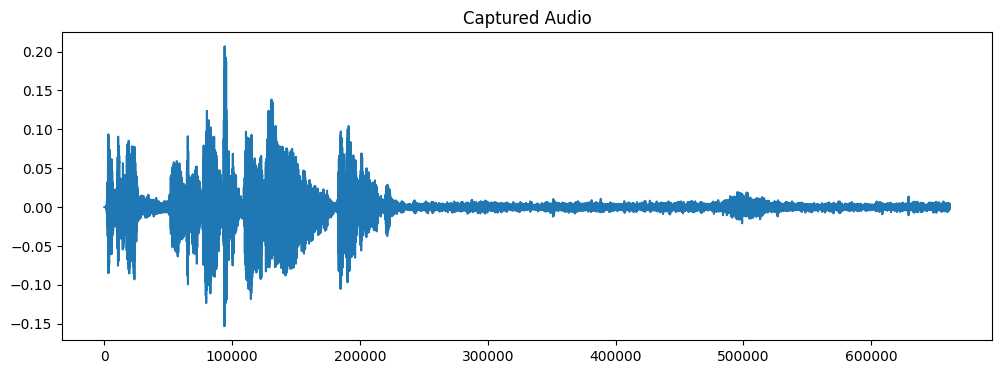

In [2]:
# Module 1: Audio Capture
def capture_audio(duration=15, fs=44100):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    print("Recording finished")
    return audio.flatten()

# Test of Module 1
audio = capture_audio()
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Captured Audio")
plt.show()

In [3]:
# Module 2: Preprocessing
def preprocess_audio(audio, fs=44100):
    # Normalization: Adjust the audio amplitude so that it is in a consistent range.
    # It helps make comparable audio signals from different sources or record them at different volumes.
    # Typically, each sample is divided by the absolute maximum value of the signal.
    audio = audio / np.max(np.abs(audio))
    
    # Silence removal: Remove parts of the signal that do not contain useful information (silence).
    # Reduces the amount of data to be processed and focuses on the relevant parts of the audio.
    # A threshold is used to determine which parts of the signal are considered silent and are removed.
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)
    
    # Apply pre-emphasis filter: Increase the energy of high frequencies relative to low frequencies.
    # Compensates for the natural tendency of speech signals to have less energy in high frequencies, which can improve feature extraction.
    # A first-order filter is applied that emphasizes higher frequencies
    preemphasized_audio = librosa.effects.preemphasis(trimmed_audio)
    
    return preemphasized_audio

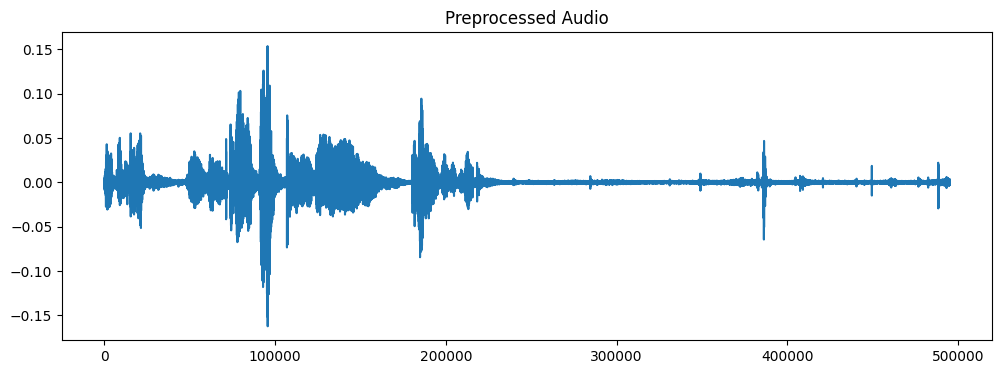

In [4]:
# Test of Module 2
processed_audio = preprocess_audio(audio)
plt.figure(figsize=(12, 4))
plt.plot(processed_audio)
plt.title("Preprocessed Audio")
plt.show()

In [5]:
# Module 3: Feature Extraction
def extract_features(audio, fs=44100):
    # MFCC extraction (Mel-Frequency Cepstral Coefficients):
        # are a representation of the short-term power spectrum of a sound. 
        # They are widely used in speech recognition due to their ability to capture important audio characteristics compactly. 
        # The process to obtain MFCCs includes several steps:
        # a) The audio signal is divided into small fragments (frames).
        # b) Fourier Transform is applied to each frame to obtain the frequency spectrum.
        # c) A Mel-scale filter bank is applied to the spectrum. The Mel scale mimics the non-linear frequency perception of the human ear.
        # d) The logarithm of the energies in each Mel filter is taken.
        # e) Discrete Cosine Transform (DCT) is applied to these logarithms.
        # The resulting coefficients are the MFCCs. 
        # Typically, the first 13-20 coefficients are used, as they contain the most relevant information about the sound structure.
    mfccs = librosa.feature.mfcc(y=audio, sr=fs, n_mfcc=13)
    
    # Mel spectrogram extraction
    # is a visual representation of the frequencies present in an audio signal over time but adapted to the Mel scale. 
    # It is constructed as follows:
    # a) The audio signal is divided into overlapping frames.
    # b) Fourier Transform is applied to each frame.
    # c) The frequency scale is converted to the Mel scale.
    # d) The energy in each Mel frequency band is calculated.
    # e) This information is represented in a 2D graph, where the x-axis is time, the y-axis is Mel frequency bands and color or intensity represents the energy at each point.
    # The Mel spectrogram provides an intuitive visual representation of how frequencies in the audio change over time, adapted to human sound perception.
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=fs)
    
    return mfccs, mel_spec

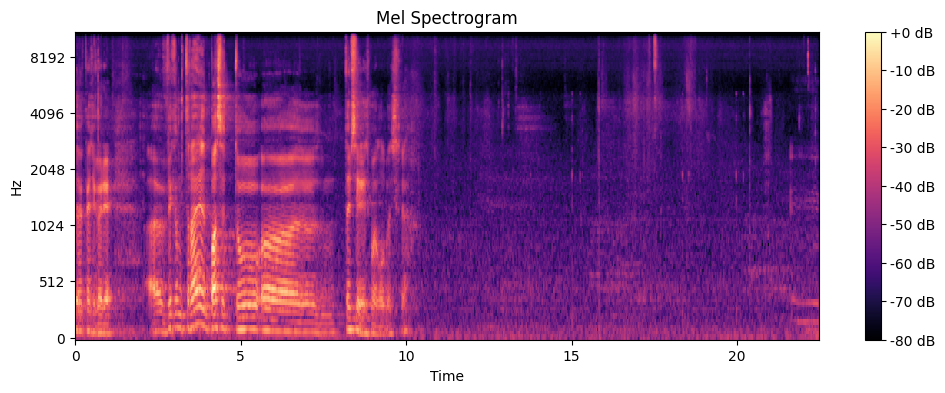

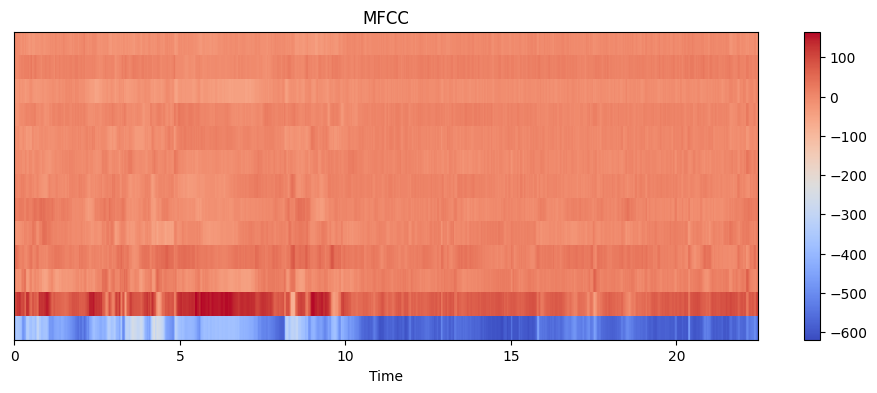

In [6]:
# Test of Module 3
mfccs, mel_spec = extract_features(processed_audio)
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [7]:
# Integration of modules
def process_voice(duration=5, fs=44100):
    audio = capture_audio(duration, fs)
    processed_audio = preprocess_audio(audio, fs)
    mfccs, mel_spec = extract_features(processed_audio, fs)
    return mfccs, mel_spec

In [8]:
# Test of integration
final_mfccs, final_mel_spec = process_voice()
print("Process completed. Features have been extracted.")

Recording...
Recording finished
Process completed. Features have been extracted.


In [9]:
print("final_mfccs: " , final_mfccs)

final_mfccs:  [[-551.5609    -431.70724   -360.9697    ... -520.6587    -514.65204
  -485.33142  ]
 [ 120.78867    128.86015    130.04858   ...   86.35214    103.37149
   135.73193  ]
 [ -17.596699   -21.800318   -26.395855  ...   10.126382    18.681774
    21.587431 ]
 ...
 [ -19.220457   -28.945623   -26.94695   ...  -10.961005    -9.564442
   -10.79046  ]
 [   9.835711    18.15121     15.731273  ...   14.171501    16.382305
    19.921375 ]
 [  10.934607     6.530777     1.3004515 ...  -13.303984   -15.650565
    -8.552002 ]]


In [10]:
print("final_mel_spec: ", final_mel_spec)

final_mel_spec:  [[8.5130469e-06 5.4801196e-05 7.0318813e-04 ... 1.2843775e-03
  8.8374992e-04 2.3693021e-03]
 [3.9418714e-04 3.1674879e-03 6.0680718e-03 ... 2.6242039e-03
  4.5880331e-03 1.1951990e-02]
 [1.8006437e-03 2.7193191e-02 9.5776051e-02 ... 3.1165360e-03
  1.5758039e-02 2.6903056e-02]
 ...
 [1.1551702e-07 1.3929190e-07 3.8831379e-07 ... 6.9294327e-07
  7.3392073e-07 7.8693176e-07]
 [1.1166933e-07 4.5095501e-08 8.8501046e-08 ... 1.2330935e-07
  9.7501719e-08 1.3163891e-07]
 [1.1007000e-07 2.7948380e-08 1.5883441e-09 ... 1.5533219e-09
  2.9128731e-09 2.8097615e-08]]


In [11]:
print("length mfcc:", final_mfccs.shape)

length mfcc: (13, 428)


In [12]:
print("length mfcc:", final_mel_spec.shape)

length mfcc: (128, 428)
